In [6]:
#Import necessary libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#Simulate soccer game result
def SoccerGameResult(sample_size: int)-> list:
    '''
    Returns a list of results of an equal probable soccer match outcomes
    The number of elements in the list (outcomes) is equal to sample_size 
    '''
    number = sample_size
    games_result = []
    for amount in range(number):
        res = random.randint(0, 2)
        if res == 0:
            games_result.append("H")
        elif res == 1:
            games_result.append("D")
        elif res == 2: 
            games_result.append('A')
    return games_result

In [135]:
#Get DataFrame of each outcome per match
result_1000 = pd.DataFrame(SoccerGameResult(10), columns=['Result'])

In [99]:
#Calculate the profit for the experiment above
def experiment(n: int):
    '''
    Calculates the profit for the experiment above if we have bet in the Home Win
    '''
    result_1000 = pd.DataFrame(SoccerGameResult(n), columns=['Result'])
    result_1000['Odd'] = 3.03
    result_1000['Profit'] = np.where(result_1000['Result'] == 'H', (1*result_1000.Odd)-1, -1)
    return result_1000.Profit.sum()

In [100]:
#Generate a thousand experiments like the one above
exp_sample = np.zeros(1000)
for i in np.arange(1,len(exp_sample)): exp_sample[i] = experiment(1000) 

In [102]:
#Check the mean of our returns
np.mean(exp_sample)

10.811129999999903

In [13]:
#Generate a 100 iterations from the experiments from a million games

returns = []
wins = []
for i in np.arange(1,100):
    result_1000 = pd.DataFrame(SoccerGameResult(1000000), columns=['Result'])
    result_1000['Odd'] = 3.00
    result_1000['Bet'] = 1
    result_1000['Profit'] = np.where(result_1000['Result'] == 'D', (1*result_1000.Odd)-1, -1)
    result_1000['Win'] = np.where(result_1000['Result'] == 'D', 1, 0)
    wins.append(result_1000.Win.sum())
    returns.append(result_1000.Profit.sum())

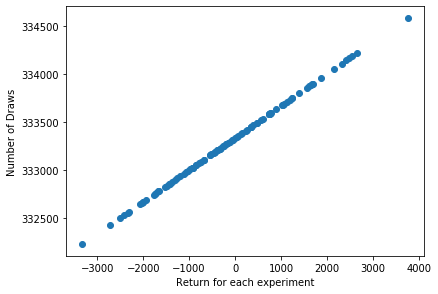

In [26]:
#Plot the number draws vs. the return 
plt.scatter(returns, wins)
plt.tight_layout()
plt.ylabel('Number of Draws')
plt.xlabel('Return for each experiment')
plt.savefig('RandomExperiment.jpeg', bbox_inches='tight')

In [29]:
average_axes01 = np.mean(returns)

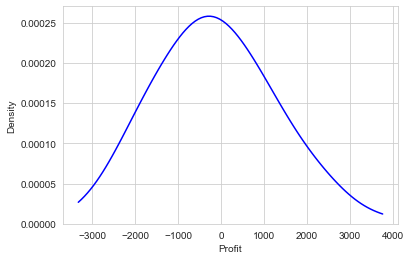

In [53]:
#Generate Density Plot of returns
import seaborn as sns
sns.set_style('whitegrid')
ax = sns.kdeplot(np.array(returns), bw=0.5, color='blue')
ax.set(xlabel='Profit', ylabel='Density')
plt.savefig('DensityExperiment1.jpeg')

In [58]:
#Add concept of margin and check returns with the bookmaker margin

returns_margin = []
returns_no_margin = []
wins_margin = []
for i in np.arange(1,100):
    result_1000 = pd.DataFrame(SoccerGameResult(1000000), columns=['Result'])
    result_1000['Odd'] = 2.82
    result_1000['Odd_No_Margin'] = 3
    result_1000['Bet'] = 1
    result_1000['Profit'] = np.where(result_1000['Result'] == 'D', (1*result_1000.Odd)-1, -1)
    result_1000['Win'] = np.where(result_1000['Result'] == 'D', 1, 0)
    result_1000['Profit_No_Margin'] = np.where(result_1000['Result'] == 'D', (1*result_1000.Odd_No_Margin)-1, -1)
    wins_margin.append(result_1000.Win.sum())
    returns_margin.append(result_1000.Profit.sum())
    returns_no_margin.append(result_1000.Profit_No_Margin.sum())

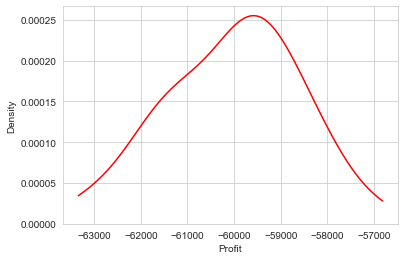

In [63]:
import seaborn as sns
sns.set_style('whitegrid')
ax = sns.kdeplot(np.array(returns_margin), bw=0.5, color='red')
ax.set(xlabel='Profit', ylabel='Density')
plt.savefig('DensityExperimentwithMargin.jpeg')

In [64]:
np.mean(returns_margin)

-60026.9181818182